<a href="https://colab.research.google.com/github/aniilkeles/Machine-Learning-Projects/blob/main/AdaBoost/39_AdaboostRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/17-cardekho.csv")

In [4]:
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [5]:
df=df.drop("Unnamed: 0",axis=1)

In [6]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [8]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [9]:
df['seats'].value_counts()

,count
seats,
5,12910
7,1922
8,311
6,127
4,77
9,55
2,7
0,2


In [10]:
df.isnull().sum()

,0
car_name,0
brand,0
model,0
vehicle_age,0
km_driven,0
seller_type,0
fuel_type,0
transmission_type,0
mileage,0
engine,0


In [11]:
df[df.duplicated()]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
197,Honda City,Honda,City,8,70000,Individual,Petrol,Manual,16.80,1497,116.30,5,545000
360,Maruti Baleno,Maruti,Baleno,2,5000,Individual,Petrol,Automatic,21.40,1197,83.10,5,686000
1353,Maruti Swift Dzire,Maruti,Swift Dzire,4,50000,Individual,Diesel,Manual,28.40,1248,74.02,5,680000
1429,Maruti Wagon R,Maruti,Wagon R,13,100000,Individual,Petrol,Manual,18.90,1061,67.00,5,150000
1485,Hyundai i20,Hyundai,i20,3,50000,Individual,Petrol,Manual,18.60,1197,81.83,5,625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15229,Maruti Swift,Maruti,Swift,8,80000,Individual,Diesel,Manual,22.90,1248,74.00,5,350000
15324,Maruti Wagon R,Maruti,Wagon R,6,50000,Individual,CNG,Manual,26.60,998,58.16,5,450000
15367,Tata Tiago,Tata,Tiago,4,30000,Individual,Petrol,Manual,23.84,1199,84.00,5,350000
15378,Hyundai Grand,Hyundai,Grand,6,30000,Individual,Petrol,Manual,18.90,1197,82.00,5,450000


In [12]:
df = df.drop_duplicates(keep='first',ignore_index=True) # keep first demek duplicate 2 tane olduğu için birini tutucak diğerini silecek

In [13]:
df[df.duplicated()]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price


In [14]:
df['seats'].value_counts()

,count
seats,
5,12767
7,1902
8,310
6,125
4,76
9,55
2,7
0,2


In [15]:
df[df['seats'] == 0]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
3207,Honda City,Honda,City,18,40000,Individual,Petrol,Manual,13.00,1493,100.00,0,115000
12504,Nissan Kicks,Nissan,Kicks,2,10000,Individual,Diesel,Manual,19.39,1461,108.49,0,1154000


In [16]:
df.loc[df['seats'] == 0,"seats"]=5

In [17]:
df[df['seats'] == 0]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price


In [18]:
df['seats'].value_counts()

,count
seats,
5,12769
7,1902
8,310
6,125
4,76
9,55
2,7


In [19]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15244.000000,1.524400e+04,15244.000000,15244.000000,15244.000000,15244.000000,1.524400e+04
mean,6.041131,5.563958e+04,19.697333,1486.171543,100.607652,5.326817,7.747014e+05
std,3.016228,5.176630e+04,4.169307,520.419390,42.915687,0.806464,8.946761e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,2.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.590000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [20]:
pd.set_option('display.float_format', '{:.2f}'.format) # bu e üzeri olan kısımları atar

In [21]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15244.00,15244.00,15244.00,15244.00,15244.00,15244.00,15244.00
mean,6.04,55639.58,19.70,1486.17,100.61,5.33,774701.45
std,3.02,51766.30,4.17,520.42,42.92,0.81,894676.08
min,0.00,100.00,4.00,793.00,38.40,2.00,40000.00
25%,4.00,30000.00,17.00,1197.00,74.00,5.00,385000.00
50%,6.00,50000.00,19.67,1248.00,88.50,5.00,559000.00
75%,8.00,70000.00,22.70,1582.00,117.30,5.00,825000.00
max,29.00,3800000.00,33.54,6592.00,626.00,9.00,39500000.00


In [22]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


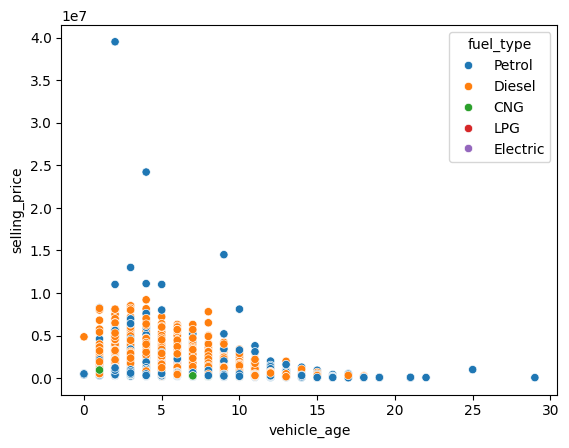

In [23]:
sns.scatterplot(x=df['vehicle_age'],y=df['selling_price'],hue=df['fuel_type'])
plt.show()

In [24]:
df['selling_price'].max() # burda görüldüğü gibi 39 milyona araba outlier ımız var ya da 24 milyon gibi burda bu ikisinden kurtulacağız

39500000

In [25]:
df = df[df['selling_price'] < 15000000]

In [26]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15242.00,15242.00,15242.00,15242.00,15242.00,15242.00,15242.00
mean,6.04,55646.31,19.70,1485.68,100.54,5.33,770623.86
std,3.02,51766.37,4.17,518.45,42.56,0.81,816170.02
min,0.00,100.00,6.00,793.00,38.40,2.00,40000.00
25%,4.00,30000.00,17.00,1197.00,74.00,5.00,385000.00
50%,6.00,50000.00,19.67,1248.00,88.50,5.00,559000.00
75%,8.00,70000.00,22.70,1582.00,117.30,5.00,825000.00
max,29.00,3800000.00,33.54,5998.00,626.00,9.00,14500000.00


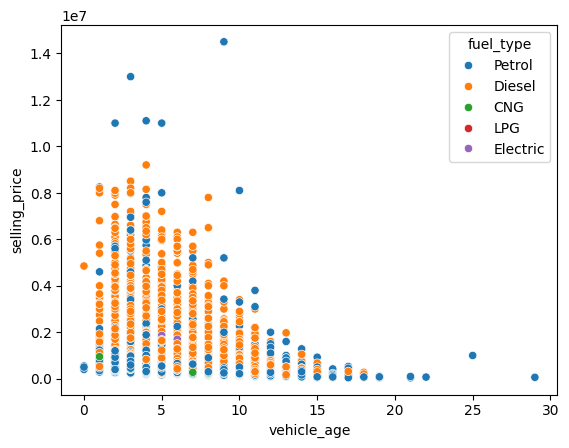

In [27]:
sns.scatterplot(x=df['vehicle_age'],y=df['selling_price'],hue=df['fuel_type'])
plt.show()

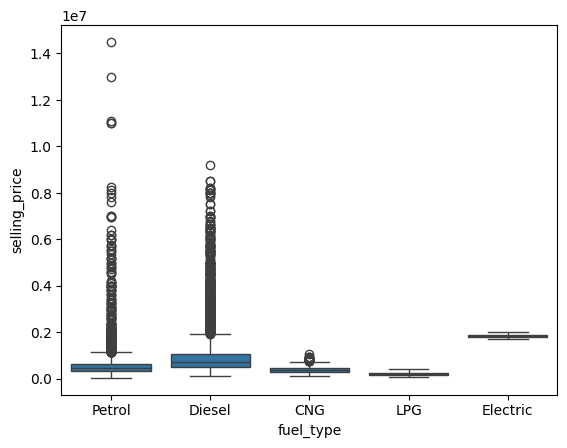

In [28]:
sns.boxplot(data=df,x="fuel_type",y="selling_price")
plt.show()

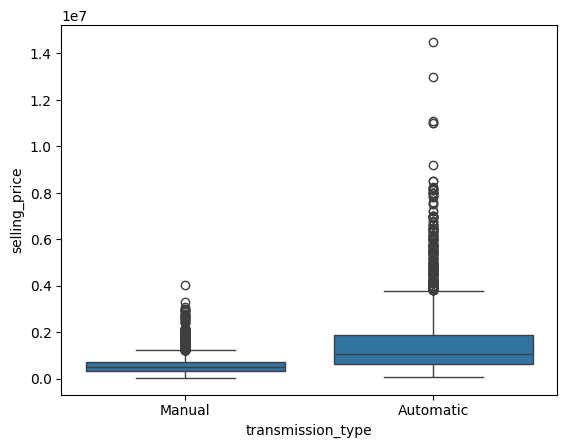

In [29]:
sns.boxplot(data=df,x="transmission_type",y="selling_price")
plt.show()

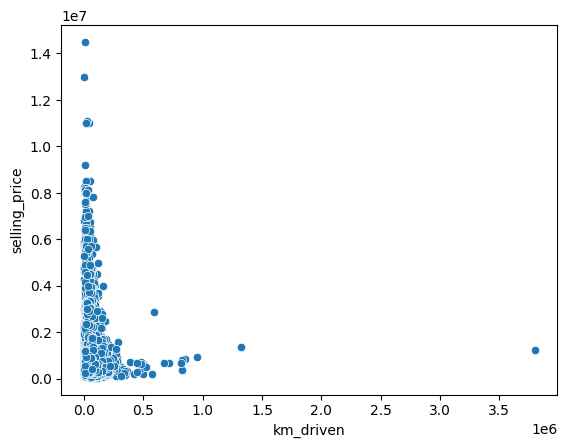

In [30]:
sns.scatterplot(x=df['km_driven'],y=df['selling_price'])
plt.show()

In [31]:
# bizim dependent target tarafındaki outlierlarımız daha önemli independent feature outlierına bakmaya çok gerek yok target outlierlar daha çok modelimizi geliştirir.

In [32]:
df = df[df['km_driven'] < 1000000]

In [33]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15240.00,15240.00,15240.00,15240.00,15240.00,15240.00,15240.00
mean,6.04,55317.32,19.70,1485.54,100.53,5.33,770556.03
std,3.02,40672.44,4.17,518.31,42.55,0.81,816201.78
min,0.00,100.00,6.00,793.00,38.40,2.00,40000.00
25%,4.00,30000.00,17.00,1197.00,74.00,5.00,385000.00
50%,6.00,50000.00,19.67,1248.00,88.50,5.00,558500.00
75%,8.00,70000.00,22.70,1582.00,117.30,5.00,825000.00
max,29.00,950000.00,33.54,5998.00,626.00,9.00,14500000.00


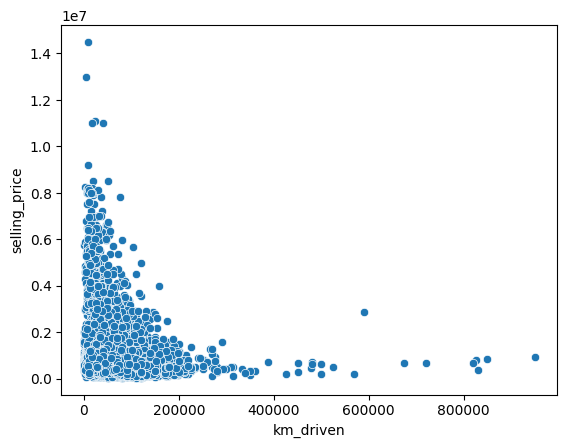

In [34]:
sns.scatterplot(x=df['km_driven'],y=df['selling_price'])
plt.show()

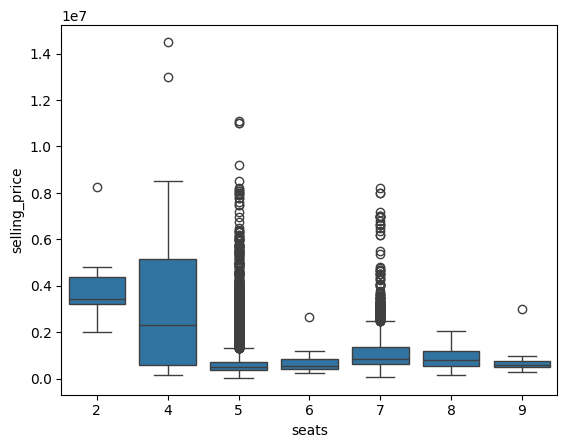

In [35]:
sns.boxplot(data=df,x="seats",y="selling_price")
plt.show()

In [36]:
df.corr(numeric_only=True) # df.corr içine numeric_only true verirsek şuan için sadece numeric olanların koreslasyonuna bakabiliriz.

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.00,0.42,-0.26,0.10,0.01,0.03,-0.26
km_driven,0.42,1.00,-0.12,0.23,0.05,0.23,-0.11
mileage,-0.26,-0.12,1.00,-0.63,-0.53,-0.44,-0.32
engine,0.10,0.23,-0.63,1.00,0.81,0.56,0.61
max_power,0.01,0.05,-0.53,0.81,1.00,0.18,0.77
seats,0.03,0.23,-0.44,0.56,0.18,1.00,0.13
selling_price,-0.26,-0.11,-0.32,0.61,0.77,0.13,1.00


In [37]:
# dependent independent features

In [38]:
X = df.drop('selling_price',axis=1)
y = df['selling_price']

In [39]:
X.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=15)

In [42]:
cat_cols = df.select_dtypes("object").columns.to_list() # kategorik olan kolonları bu şekilde alabiliriz.

In [43]:
cat_cols

['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']

In [44]:
unique_values = df[cat_cols].nunique()

In [45]:
unique_values

,0
car_name,119
brand,30
model,118
seller_type,3
fuel_type,5
transmission_type,2


In [47]:
# seller_type fuel_type transmission_type => one-hot-encoding
# car_name brand model => bunlar için one-hot encoding yapılması saçma olur çünkü çok fazla kolon ekler one-hot-encoding bunlardan encoding işlemi bittikten sonra belki car_name düşürebiliriz ya da brand ve modeli
# çünkü aynı kolonlar fakat şimdilik frequency encoding yapacağız.Mean imputingde yapabilirdik kategorik olmasaydı.

In [48]:
onehot_columns = ['seller_type','fuel_type','transmission_type']
freq_columns = ['car_name','brand','model']

In [52]:
# X_train[col].value_counts()/len(X_train) bu şekilde frequency yüzdelerini görebiliriz.
for col in freq_columns:
   freq =  X_train[col].value_counts()/len(X_train)

   X_train[col + '_freq'] = X_train[col].map(freq) # frequencyle değiştirir map fonksiyonu X_trainin içindeki kolonları car_name olan

   X_test[col + '_freq'] = X_test[col].map(freq) # bu frequency yi X_traine göre hesapladık yine fit_transform transform mantığı data leakage olmasın diye

   mean_freq = freq.mean()
   X_test[col + '_freq'] = X_test[col + '_freq'].fillna(mean_freq)

In [53]:
X_train.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,car_name_freq,brand_freq,model_freq
6205,Mahindra XUV500,Mahindra,XUV500,2,18000,Individual,Diesel,Manual,15.10,2179,152.87,7,0.02,0.07,0.02
7707,Tata Nexon,Tata,Nexon,4,25000,Individual,Petrol,Manual,17.00,1198,108.50,5,0.01,0.03,0.01
5332,Mahindra XUV500,Mahindra,XUV500,4,58500,Dealer,Diesel,Manual,16.00,2179,140.00,7,0.02,0.07,0.02
2935,Maruti Eeco,Maruti,Eeco,6,59000,Dealer,Petrol,Manual,15.10,1196,73.00,7,0.01,0.32,0.01
6419,Maruti Baleno,Maruti,Baleno,4,32000,Dealer,Petrol,Manual,21.01,1197,81.80,5,0.02,0.32,0.02


In [54]:
X_test.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,car_name_freq,brand_freq,model_freq
10573,Hyundai i10,Hyundai,i10,7,90000,Dealer,Petrol,Manual,19.81,1086,68.05,5,0.03,0.20,0.03
4407,Ford Ecosport,Ford,Ecosport,4,45000,Individual,Diesel,Manual,23.00,1498,98.96,5,0.03,0.05,0.03
5654,Maruti Baleno,Maruti,Baleno,4,71000,Dealer,Diesel,Manual,27.39,1248,74.00,5,0.02,0.32,0.02
13787,Volkswagen Vento,Volkswagen,Vento,4,37959,Dealer,Petrol,Automatic,18.19,1197,103.20,5,0.02,0.04,0.02
1156,Maruti Ciaz,Maruti,Ciaz,2,15260,Dealer,Diesel,Manual,28.09,1248,88.50,5,0.02,0.32,0.02


In [55]:
X_train = X_train.drop(["car_name","brand","model"],axis=1)
X_test = X_test.drop(["car_name","brand","model"],axis=1)

In [56]:
X_train.head()

,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,car_name_freq,brand_freq,model_freq
6205,2,18000,Individual,Diesel,Manual,15.10,2179,152.87,7,0.02,0.07,0.02
7707,4,25000,Individual,Petrol,Manual,17.00,1198,108.50,5,0.01,0.03,0.01
5332,4,58500,Dealer,Diesel,Manual,16.00,2179,140.00,7,0.02,0.07,0.02
2935,6,59000,Dealer,Petrol,Manual,15.10,1196,73.00,7,0.01,0.32,0.01
6419,4,32000,Dealer,Petrol,Manual,21.01,1197,81.80,5,0.02,0.32,0.02


In [57]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [58]:
transformer = ColumnTransformer(
         transformers=[("onehot",OneHotEncoder(drop="first",handle_unknown="ignore"),onehot_columns)],remainder="passthrough"
)

In [59]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [60]:
encoded_cols = transformer.get_feature_names_out()

In [61]:
encoded_cols

array(['onehot__seller_type_Individual',
       'onehot__seller_type_Trustmark Dealer', 'onehot__fuel_type_Diesel',
       'onehot__fuel_type_Electric', 'onehot__fuel_type_LPG',
       'onehot__fuel_type_Petrol', 'onehot__transmission_type_Manual',
       'remainder__vehicle_age', 'remainder__km_driven',
       'remainder__mileage', 'remainder__engine', 'remainder__max_power',
       'remainder__seats', 'remainder__car_name_freq',
       'remainder__brand_freq', 'remainder__model_freq'], dtype=object)

In [62]:
X_train = pd.DataFrame(X_train,columns=encoded_cols)
X_test = pd.DataFrame(X_test,columns=encoded_cols)

In [63]:
X_train.head()

,onehot__seller_type_Individual,onehot__seller_type_Trustmark Dealer,onehot__fuel_type_Diesel,onehot__fuel_type_Electric,onehot__fuel_type_LPG,onehot__fuel_type_Petrol,onehot__transmission_type_Manual,remainder__vehicle_age,remainder__km_driven,remainder__mileage,remainder__engine,remainder__max_power,remainder__seats,remainder__car_name_freq,remainder__brand_freq,remainder__model_freq
0,1.00,0.00,1.00,0.00,0.00,0.00,1.00,2.00,18000.00,15.10,2179.00,152.87,7.00,0.02,0.07,0.02
1,1.00,0.00,0.00,0.00,0.00,1.00,1.00,4.00,25000.00,17.00,1198.00,108.50,5.00,0.01,0.03,0.01
2,0.00,0.00,1.00,0.00,0.00,0.00,1.00,4.00,58500.00,16.00,2179.00,140.00,7.00,0.02,0.07,0.02
3,0.00,0.00,0.00,0.00,0.00,1.00,1.00,6.00,59000.00,15.10,1196.00,73.00,7.00,0.01,0.32,0.01
4,0.00,0.00,0.00,0.00,0.00,1.00,1.00,4.00,32000.00,21.01,1197.00,81.80,5.00,0.02,0.32,0.02


In [64]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   onehot__seller_type_Individual        10668 non-null  float64
 1   onehot__seller_type_Trustmark Dealer  10668 non-null  float64
 2   onehot__fuel_type_Diesel              10668 non-null  float64
 3   onehot__fuel_type_Electric            10668 non-null  float64
 4   onehot__fuel_type_LPG                 10668 non-null  float64
 5   onehot__fuel_type_Petrol              10668 non-null  float64
 6   onehot__transmission_type_Manual      10668 non-null  float64
 7   remainder__vehicle_age                10668 non-null  float64
 8   remainder__km_driven                  10668 non-null  float64
 9   remainder__mileage                    10668 non-null  float64
 10  remainder__engine                     10668 non-null  float64
 11  remainder__max_

In [66]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import RandomizedSearchCV

In [67]:
ada = AdaBoostRegressor()

In [68]:
ada.fit(X_train,y_train)

AdaBoostRegressor()

In [69]:
y_pred = ada.predict(X_test)

In [70]:
print("r2_score : ",r2_score(y_test,y_pred))
print("mean squared error : ",mean_squared_error(y_test,y_pred))
print("mean absolute error : ",mean_absolute_error(y_test,y_pred))

r2_score :  0.6186209016697418
mean squared error :  250031372294.49573
mean absolute error :  416536.8849340742


In [71]:
params = {
    "n_estimators" : [50,80,100,120],
    "learning_rate" : [0.001,0.01,0.1,1.0,2.0],
    "loss" : ["linear","square","exponential"]
}

In [72]:
rcv = RandomizedSearchCV(estimator = AdaBoostRegressor(),param_distributions=params,scoring='r2',cv=5)

In [73]:
rcv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1, 1.0,
                                                          2.0],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 80, 100, 120]},
                   scoring='r2')

In [74]:
rcv.best_params_

{'n_estimators': 120, 'loss': 'exponential', 'learning_rate': 0.1}

In [75]:
y_pred = rcv.predict(X_test)

In [76]:
print("r2_score : ",r2_score(y_test,y_pred))
print("mean squared error : ",mean_squared_error(y_test,y_pred))
print("mean absolute error : ",mean_absolute_error(y_test,y_pred))

r2_score :  0.7843608955599972
mean squared error :  141372564567.76382
mean absolute error :  235107.70612973568


In [81]:
params = {
    "estimator__max_depth" : [3,4,5],
    "n_estimators" : [50,80,100,120],
    "learning_rate" : [0.001,0.01,0.1,1.0,2.0],
    "loss" : ["linear","square","exponential"]
}

In [82]:
rcv = RandomizedSearchCV(estimator = AdaBoostRegressor(DecisionTreeRegressor()),param_distributions=params,scoring='r2',cv=5,n_jobs=-1) # aslında adaboost regressor içinde estimator_max_depth yok rcvyi oluştururken adaboostregressor estimator alır
# bunu vermezsek default olarak decisiontree regressor olarak verir  AdaBoostRegressor(DecisiontTreeRegressor()) olarak verir decisiontree regressor un içinde max_depth default olarak 3 tutulur

In [83]:
rcv.fit(X_train,y_train) # biz böyle yapınca decisiontree regressor un içindeki parametrelerede bulaşmış oluruz

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor()),
                   n_jobs=-1,
                   param_distributions={'estimator__max_depth': [3, 4, 5],
                                        'learning_rate': [0.001, 0.01, 0.1, 1.0,
                                                          2.0],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 80, 100, 120]},
                   scoring='r2')

In [84]:
rcv.best_params_

{'n_estimators': 50,
 'loss': 'linear',
 'learning_rate': 0.01,
 'estimator__max_depth': 5}

In [85]:
y_pred = rcv.predict(X_test)

In [86]:
print("r2_score : ",r2_score(y_test,y_pred))
print("mean squared error : ",mean_squared_error(y_test,y_pred))
print("mean absolute error : ",mean_absolute_error(y_test,y_pred)) # görüldüğü gibi r2 score artmış oldu max_dept hyperparameter-tuning yapınca

r2_score :  0.8793800978589486
mean squared error :  79078166030.58478
mean absolute error :  147580.84665490667
